In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/Users/nithinbodla/DataScience/DATASETS/student.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [9]:
df.shape

(1000, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df['gender'].dtypes

dtype('O')

In [17]:
df['gender'].dtypes=='O'

True

In [21]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [23]:
cat_col = [fea for fea in df.columns if df[fea].dtype == 'O']
num_col = [fea for fea in df.columns if df[fea].dtype != 'O']

In [27]:
df[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [29]:
df[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [31]:
df.memory_usage()

Index                           132
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

# Missing Values

In [34]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [36]:
df.isnull().sum().sum()

0

In [40]:
df.duplicated().sum()

0

In [42]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [46]:
df.skew()

TypeError: could not convert string to float: 'female'

<Axes: xlabel='math score', ylabel='Density'>

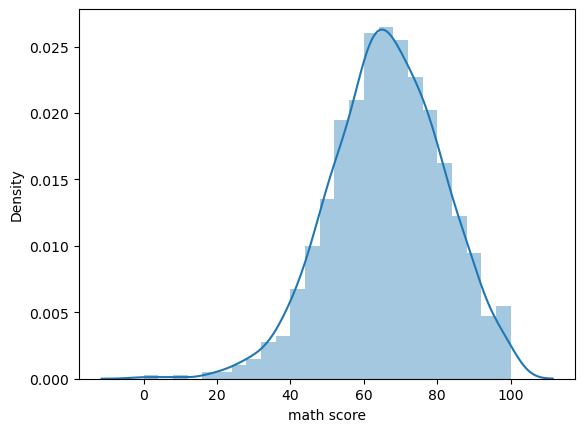

In [54]:
sns.distplot(df['math score'])

In [56]:
df['Average'] = (df['math score'] + df['reading score'] + df['writing score'])/3

In [58]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [60]:
df.groupby('gender').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [64]:
df.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


# you have to find out no of student whoever is having less than 30 marks math

In [67]:
df[df['math score'] <30 ] .count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
Average                        14
dtype: int64

In [69]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Average'],
      dtype='object')

In [71]:
df_num=df[num_col]

In [73]:
df_num

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [75]:
from scipy.stats import normaltest

If p value > 0.05.., we can say that our data is normally distributed.

In [78]:
normaltest(df_num['reading score'])

NormaltestResult(statistic=11.11741279628622, pvalue=0.0038537584035765837)

In [80]:
normaltest(df_num['reading score'])[1]

0.0038537584035765837

In [82]:
normaltest(df_num['reading score'])[1] *100

0.3853758403576584

<Axes: xlabel='reading score', ylabel='Density'>

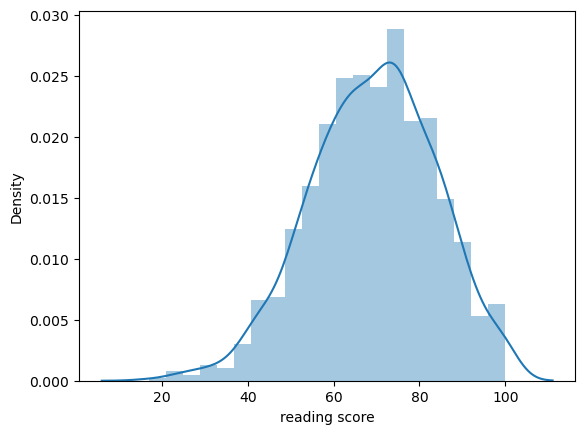

In [86]:
sns.distplot(df_num['reading score'])

# Outlier

<Axes: ylabel='reading score'>

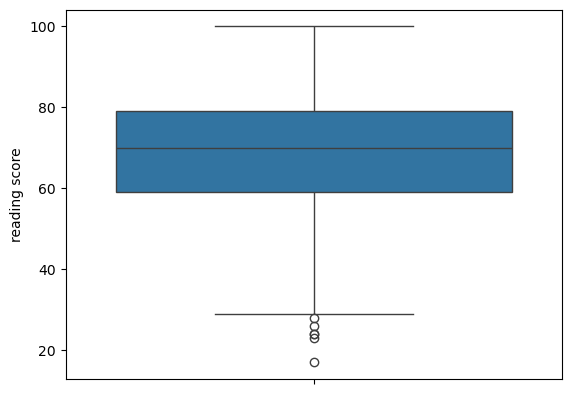

In [89]:
sns.boxplot(data=df['reading score'])

In [91]:
q1=df['math score'].quantile(0.25)

In [93]:
q3=df['math score'].quantile(0.75)

In [95]:
IQR = q3-q1

In [103]:
upper_limit = q3+(1.5*IQR)
upper_limit

107.0

In [105]:
lower_limit = q1-(1.5*IQR)
lower_limit

27.0

In [107]:
df_outlier = df[df['math score'] < lower_limit]

In [109]:
df_outlier

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [111]:
df_num.drop(df_outlier.index)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [119]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [123]:
df[df['math score'] > upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average


In [125]:
df['math score'].quantile(1.00)

100.0

In [127]:
df['math score'].min()

0

In [129]:
df['math score'].max()

100

In [131]:
df['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

In [133]:
def get_iqr(df,column_name,q1_range,q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3 - q1
    upper_fence = q3 + 1.5 * IQR
    lower_fence = q1 - 1.5 * IQR
    return IQR,upper_fence,lower_fence
    

In [135]:
df_num.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [137]:
replace_with_threshold(df_num,df_num.columns)

NameError: name 'replace_with_threshold' is not defined

In [139]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [143]:
df_num.loc[df['math score']<lower_limit,'math score']

17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math score, dtype: int64

In [145]:
df_num.loc[df_num['math score']<lower_limit,'math score']=lower_limit

In [147]:
df_num

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


# Graph Analysis

In [150]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<Axes: xlabel='count', ylabel='gender'>

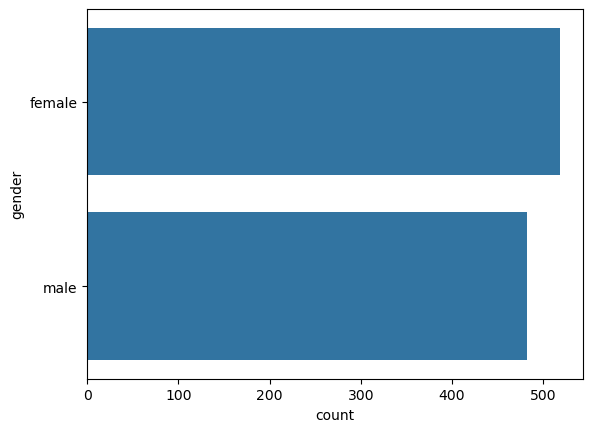

In [152]:
sns.countplot(df['gender'])

<Axes: xlabel='count', ylabel='race/ethnicity'>

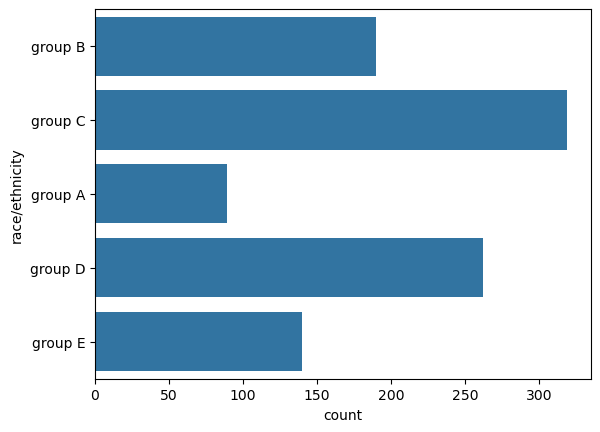

In [154]:
sns.countplot(df['race/ethnicity'])

In [156]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [160]:
df1 = df.groupby('gender').mean(numeric_only=True)

print(df1)

        math score  reading score  writing score    Average
gender                                                     
female   63.633205      72.608108      72.467181  69.569498
male     68.728216      65.473029      63.311203  65.837483


In [162]:
df1['Average'][0]

69.56949806949807

In [164]:
df1['Average'][1]

65.8374827109267

In [166]:
df1['math score'][0]

63.633204633204635

In [168]:
df1['math score'][1]

68.72821576763485

In [176]:
female_score=df1['Average'][0],df1['math score'][0]

In [178]:
female_score

(69.56949806949807, 63.633204633204635)

In [180]:
male_score=df1['Average'][1],df1['math score'][1]

In [182]:
male_score

(65.8374827109267, 68.72821576763485)

<BarContainer object of 2 artists>

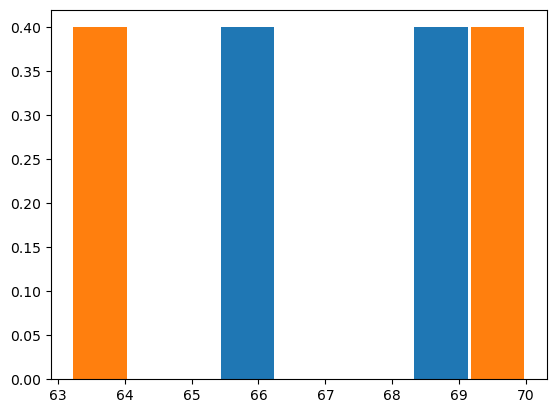

In [188]:
plt.bar(male_score,0.4,label='male')
plt.bar(female_score,0.4,label='female')


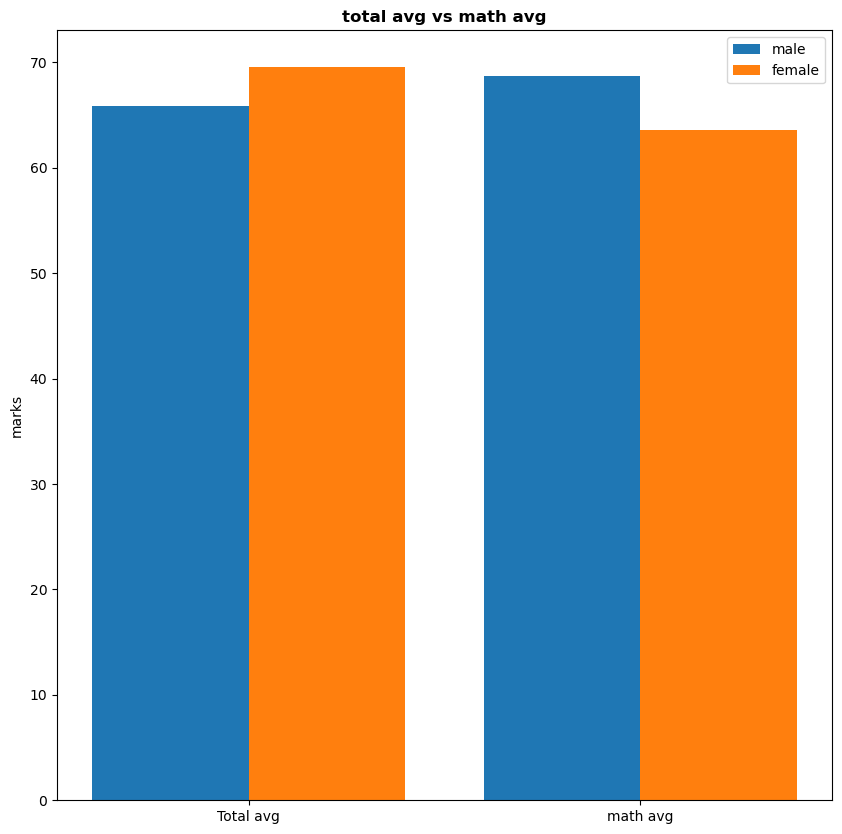

In [190]:
plt.figure(figsize=(10,10))
X=['Total avg','math avg']
female_score=df1['Average'][0],df1['math score'][0]
male_score=df1['Average'][1],df1['math score'][1]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')

plt.xticks(X_axis,X) # Replaces the numeric X-axis positions [0, 1] with the labels ['Total avg', 'math avg'].
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight='bold')
plt.legend()
plt.show()

In [192]:
df_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [194]:
df_num.corr()

,math score,reading score,writing score
math score,1.000000,0.815908,0.800008
reading score,0.815908,1.000000,0.954598
writing score,0.800008,0.954598,1.000000


<Axes: >

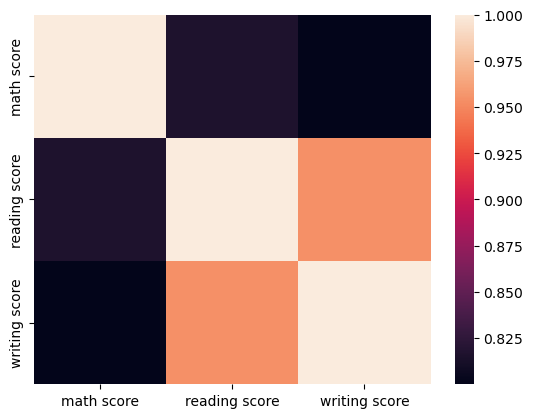

In [196]:
sns.heatmap(df_num.corr())

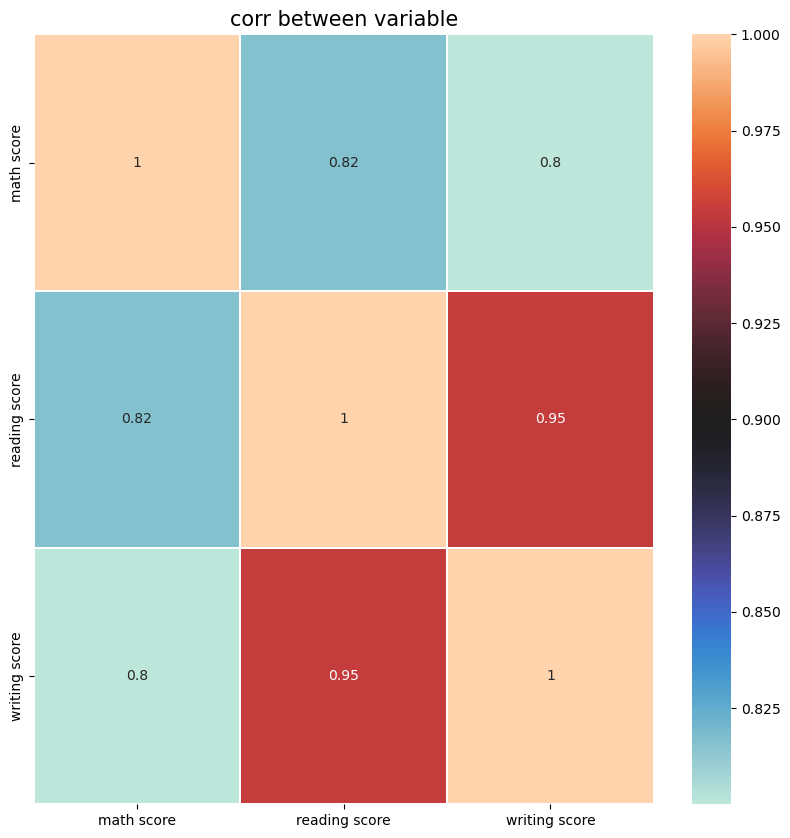

In [198]:
sns.heatmap(df_num.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()

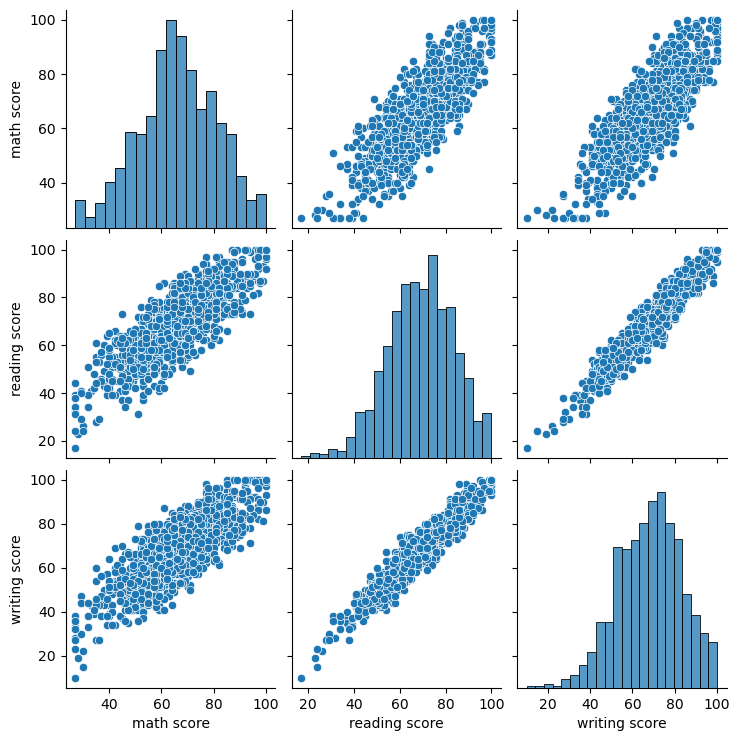

In [200]:
sns.pairplot(df_num)

<Axes: >

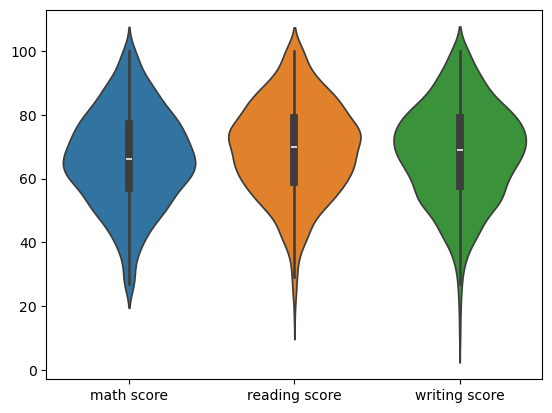

In [204]:
sns.violinplot(data=df_num)

In [206]:
from sklearn.preprocessing import StandardScaler

In [208]:
scaler = StandardScaler()

In [212]:
scaler.fit(df_num)

StandardScaler()

In [214]:
scaler.transform(df_num)

array([[ 0.39121817,  0.19399858,  0.39149181],
       [ 0.19007772,  1.42747598,  1.31326868],
       [ 1.59806086,  1.77010859,  1.64247471],
       ...,
       [-0.48039044,  0.12547206, -0.20107904],
       [ 0.12303091,  0.60515772,  0.58901542],
       [ 0.72645225,  1.15336989,  1.18158627]])

10 dataset

pick anyone

perform detail EDA in one ipynb

perform missing value handle if it is there in one ipynb all the method(10-12)

perform outlier handle if it is there in one ipynb all the method(10-12)

perform encoding  if it is required in one ipynb all the method(10-12)

perform scaling one ipynb all the method(10-12)

perform feature selection in one ipynb all the method(10-12)

perform transformation one ipynb all the method(10-12)

all 10 dataset you can solve it you can keep those solution in github